In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

In [ ]:
df = df[['customer_id','course_id','type','state','course_title','category_title','format','completed_at',
         'transaction_amount','coupon_title','coupon_discount_amount','sale_price','pg','method','subcategory_title','marketing_start_at']]
df.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [ ]:
df[(df['transaction_amount'] == 0) & (df['coupon_title'].str.contains('무료'))]
#transaction_amount가 0인 것 중 coupon_title에 무료 단어가 포함된 것

In [ ]:
df[(df['state'] == 'COMPLETED') & (df['transaction_amount'] + df['coupon_discount_amount'] == df['sale_price'])]
#state가 COMPLETED이고, transaction_amount 값이랑 coupon_discount_amount 값을 더했을 때 sale_price랑 같은 것

In [ ]:
len(df.drop_duplicates(['customer_id']))
#customer_id에서 중복을 제거하면 서로 다른 사람 인원 수가 제공

In [ ]:
df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
#웰컴이거나 WELCOME(한영키변환) 쿠폰

In [ ]:
df[(df['course_title'].str.contains('직장인')) & (df['state'] == 'COMPLETED')]
#course_title에 직장인 단어가 포함되면서 state가 COMPLETED인 것

In [ ]:
Z = input('다음 중 선택 : {type, state, category_title, format, pg, method, subcategory_title}')
df[Z].value_counts()
#column 넣으면 종류와 그 개수를 보여주기(value_counts, unique)

In [ ]:
for i in df['type'].unique():
  for j in df['state'].unique():
    print(f'type의 {i}랑 state의 {j}랑 같은 개수', ((df['type'] == i) & (df['state'] == j)).sum())
#type과 state간의 관계(개수)

In [ ]:
for i in df['category_title'].unique():
  for j in ['transaction_amount','sale_price']:
    print(f'{i}의 {j} 부문 가격 합 :', df[df['category_title'] == i][j].sum())
#category_title마다 가격 합

In [ ]:
df[df['type'] == 'REFUND']['category_title'].value_counts()
#category_title별 환불된 개수

In [ ]:
df[df['type'] == 'REFUND']['format'].value_counts()
#format별 환불율을 위한 중간 단계

In [ ]:
df[df['coupon_discount_amount'] > 0]['pg'].value_counts()
#pg별 할인이 존재하는 개수

In [ ]:
df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df.replace({'category_title':{'일러스트':'디자인'}})
#프레임 내부 데이터를 바꾸고 싶다면 {column이름:{원래 있는 것을:이렇게 바꾼다}}

In [ ]:
(df['completed_at'] - df['marketing_start_at']).describe()
#날짜 차이 4분위수

In [ ]:
from datetime import datetime, timedelta
time1 = datetime(2018, 7, 12, 21, 40, 5)
time2 = datetime(2018, 8, 11, 21, 40, 5)
time3 = datetime(2018, 10, 21, 21, 40, 5)
time4 = datetime(2019, 3, 19, 21, 40, 5)

def func(x):
    if x < time1-time1:
        return "사전예약"
    elif x < time2-time1:
        return "30일 미만"
    elif x < time3-time1:
        return "30일 이상 101일 미만"
    elif x < time4-time1:
        return "101일 이상 250일 미만"
    else:
        return "250일 이상"
df['시간계산'] = (df.completed_at - df.marketing_start_at).apply(func)
for i in ['사전예약','30일 미만','30일 이상 101일 미만','101일 이상 250일 미만','250일 이상']:
  for j in df['category_title'].unique():
    print(f'{i} 에서 {j} 카테고리 :',((df['시간계산'] == i) & (df['category_title'] == j) & (df['state'] == 'COMPLETED')).sum())
#marketing_start_at와 completed_at 사이에서 기간별 정리

                                                          여기부터 시작

In [ ]:
#메인과 서브 카테고리별로 가격의 max, min, mean
중간단계 = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
네번째주제 = 중간단계.replace({'category_title':{'일러스트':'디자인'}})
for i in ['지식콘텐츠','비즈니스','파이낸스','관리']:
  네번째주제 = 네번째주제[네번째주제.category_title != i]
for j in 네번째주제['category_title'].unique():
  print(f'메인카테 {j} 의 sale_price최대값 ',네번째주제[네번째주제['category_title'] == j]['sale_price'].max())
  print(f'메인카테 {j} 의 sale_price최소값 ',네번째주제[네번째주제['category_title'] == j]['sale_price'].min())
  print(f'메인카테 {j} 의 sale_price평균값 ',네번째주제[네번째주제['category_title'] == j]['sale_price'].mean())
  print('')
for k in 네번째주제['subcategory_title'].unique():
  print(f'서브카테 {k} 의 sale_price최대값 ',네번째주제[네번째주제['subcategory_title'] == k]['sale_price'].max())
  print(f'서브카테 {k} 의 sale_price최소값 ',네번째주제[네번째주제['subcategory_title'] == k]['sale_price'].min())
  print(f'서브카테 {k} 의 sale_price평균값 ',네번째주제[네번째주제['subcategory_title'] == k]['sale_price'].mean())
  print('')

In [ ]:
#메인 카테고리에서 환불 개수와 비율
중간단계 = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
첫번째주제 = 중간단계.replace({'category_title':{'일러스트':'디자인'}})
for i in ['지식콘텐츠','비즈니스','파이낸스','관리']:
  첫번째주제 = 첫번째주제[첫번째주제.category_title != i]
for j in 첫번째주제['category_title'].unique():
  print(f'메인카테 {j} 의 환불된 개수 ',(첫번째주제[첫번째주제['category_title'] == j]['type'] == 'REFUND').sum())
  print(f'메인카테 {j} 의 환불된 비율 ',(첫번째주제[첫번째주제['category_title'] == j]['type'] == 'REFUND').sum() / (첫번째주제['category_title'] == j).sum())
  print('')

In [ ]:
#메인 카테고리에는 어떤 서브 카테고리가 들어있는가?
k = 0
for i in df['category_title'].unique():
  for j in df['subcategory_title'].unique():
    if ((df['category_title'] == i) & (df['subcategory_title'] == j)).sum() > 0:
      print(f'{i} in {j} ',((df['category_title'] == i) & (df['subcategory_title'] == j)).sum())
      k += 1
  print('')
print(k)

In [ ]:
#얼마 할인해줬을 때 가장 많은 결제를 했는가?
def func(x):
  if x == 0:
    return "0원"
  elif x <= 10000:
    return "10000원 이하"
  elif x <= 20000:
    return "10000원 초과 20000원 이하"
  elif x <= 30000:
    return "20000원 초과 30000원 이하"
  elif x <= 40000:
    return "30000원 초과 40000원 이하"
  elif x <= 50000:
    return "40000원 초과 50000원 이하"
  elif x > 50000:
    return "50000원 초과"
  else:
    return "NaN"
df['쿠폰_값'] = (df['coupon_discount_amount']).apply(func)
for i in ['0원','10000원 이하','10000원 초과 20000원 이하','20000원 초과 30000원 이하','30000원 초과 40000원 이하','40000원 초과 50000원 이하','50000원 초과','NaN']:
  print(f'{i}일 때 PAYMENT 개수 ',((df['쿠폰_값'] == i) & (df['type'] == 'PAYMENT')).sum())
  print(f'{i}일 때 전체 개수 ',((df['쿠폰_값'] == i).sum()))
  print(f'{i}일 때 PAYMENT 비율 ',((df['쿠폰_값'] == i) & (df['type'] == 'PAYMENT')).sum() / (df['쿠폰_값'] == i).sum())
  print('')

In [ ]:
#메인 카테고리별로 쿠폰 할인이 1원 이상, 0원, 결측치 개수를 확인
for i in df['category_title'].unique():
  print(f'메인카테 {i} 에서 쿠폰할인 1원 이상 ',((df['category_title'] == i) & (df['coupon_discount_amount'] > 0)).sum())
  print(f'메인카테 {i} 에서 쿠폰할인 0원 ',((df['category_title'] == i) & (df['coupon_discount_amount'] == 0)).sum())
  print(f'메인카테 {i} 에서 쿠폰할인 결측 ',((df['category_title'] == i) & (df['coupon_discount_amount'].isnull())).sum())
  print('')

In [ ]:
#웰컴 또는 WELCOME 쿠폰을 받고 PAYMENT를 띄운 사람들 중에서 재결제한 사람 수(여기서는 웰컴/WELCOME을 중복해서 받은 사람)
중간단계 = df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
세번째주제 = 중간단계[중간단계['type'] == 'PAYMENT']
세번째주제

In [ ]:
#결재대행사별 쿠폰 할인가가 1원 이상인 개수
for i in df['pg'].unique():
  print(f'{i} 결제대행사에서의 쿠폰 값 1원 이상 ',((df['coupon_discount_amount'] > 0) & (df['pg'] == i)).sum())
  print('')

In [ ]:
#쿠폰 할인가가 원가를 역전하는 개수
(df['sale_price'] - df['coupon_discount_amount'] < 0).sum()

In [ ]:
print(df['state'].unique())
print(df['type'].unique())
print(df['category_title'].unique())

['CANCELLED' 'COMPLETED' 'PENDING' 'DELETED' 'REQUESTED']
['ORDER' 'PAYMENT' 'REFUND' 'TRANSACTION']
['프로그래밍' '영상/3D' '업무 생산성' '크리에이티브' '부동산/금융' '데이터사이언스' '디자인' '마케팅' '교육'
 '투자/재테크' nan '관리' '데이터 사이언스' '비즈니스' '지식콘텐츠' '일러스트' '파이낸스']


In [ ]:
#웰컴 또는 WELCOME 쿠폰을 받고 PAYMENT를 띄운 사람들 중에서 재결제한 사람 수(찐)
a단계 = df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
b단계 = a단계[(a단계['type'] == 'PAYMENT') & (a단계['state'] == 'COMPLETED')]
c단계 = df.loc[df['customer_id'].isin(b단계['customer_id'].unique())]
최종단계 = c단계[(c단계['type'] == 'PAYMENT') & (c단계['state'] == 'COMPLETED')]
최종단계

                                                                여기부터 실전

In [ ]:
#메인 카테고리별로 환불된 개수와 비율을 별도의 데이터프레임으로 구분
중간단계 = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
첫번째주제 = 중간단계.replace({'category_title':{'일러스트':'디자인'}})
for i in ['지식콘텐츠','비즈니스','파이낸스','관리']:
  첫번째주제 = 첫번째주제[첫번째주제.category_title != i]
AA = []
AB = []
AC = []
AD = []
for j in 첫번째주제['category_title'].unique():
  AD.append(j)
  x = ((첫번째주제['category_title'] == j) & (첫번째주제['state'] == 'COMPLETED') & (첫번째주제['type'] == 'PAYMENT')).sum()
  AA.append(x)
  y = ((첫번째주제['category_title'] == j) & (첫번째주제['state'] == 'COMPLETED') & (첫번째주제['type'] == 'REFUND')).sum()
  AB.append(y)
  AC.append(y / x)

시각화첫번째 = pd.DataFrame({'pay_complete':AA,
                          'pay_refund':AB,
                          '비율':AC,
                          '카테고리':AD})
시각화첫번째 = 시각화첫번째.dropna()
시각화첫번째

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


,pay_complete,pay_refund,비율,카테고리
0,17608,1455,0.082633,프로그래밍
1,5153,366,0.071027,영상/3D
2,6623,345,0.052091,업무 생산성
3,840,114,0.135714,크리에이티브
4,2864,148,0.051676,부동산/금융
5,6904,453,0.065614,데이터사이언스
6,5715,459,0.080315,디자인
7,4712,365,0.077462,마케팅
8,927,5,0.005394,교육
9,1490,107,0.071812,투자/재테크


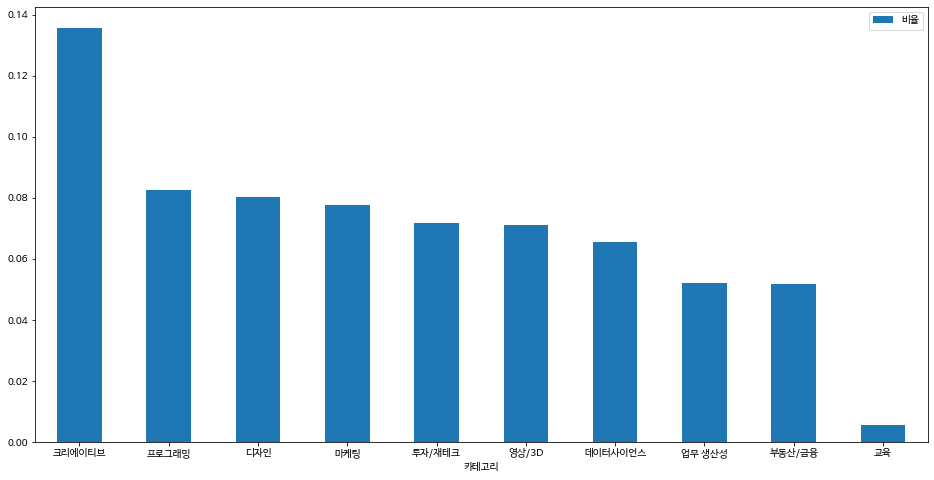

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화첫번째.sort_values(by=['비율'],ascending=False).plot.bar(x='카테고리', y='비율', rot=0, figsize=(16,8))

In [ ]:
#서브 카테고리별로 환불된 개수와 비율을 별도의 데이터프레임으로 구분
DA = []
DB = []
DC = []
DD = []
for j in df['subcategory_title'].unique():
  DD.append(j)
  x = ((df['subcategory_title'] == j) & (df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT')).sum()
  DA.append(x)
  y = ((df['subcategory_title'] == j) & (df['state'] == 'COMPLETED') & (df['type'] == 'REFUND')).sum()
  DB.append(y)
  DC.append(y / x)

시각화서브 = pd.DataFrame({'pay_complete':DA,
                          'pay_refund':DB,
                          '비율':DC,
                          '서브카테고리':DD})
시각화서브 = 시각화서브.dropna()
시각화서브

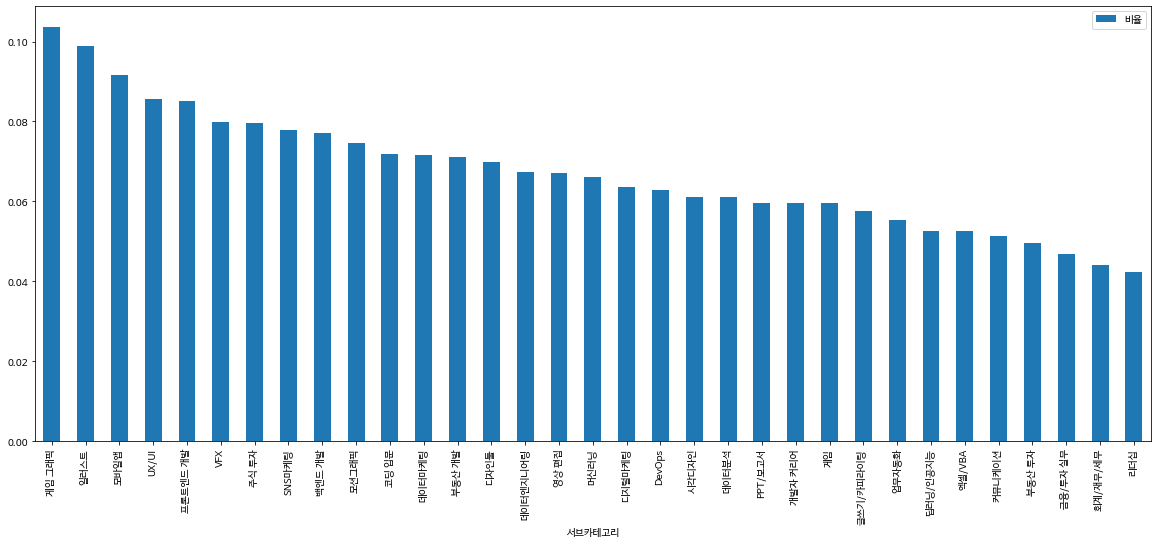

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화서브.sort_values(by=['비율'],ascending=False).plot.bar(x='서브카테고리', y='비율', rot=90, figsize=(20,8))

In [ ]:
#할인 값에 따른 결제 비율
def func(x):
  if x == 0:
    return "0원"
  elif x <= 10000:
    return "10000원 이하"
  elif x <= 20000:
    return "10000원 초과 20000원 이하"
  elif x <= 30000:
    return "20000원 초과 30000원 이하"
  elif x <= 40000:
    return "30000원 초과 40000원 이하"
  elif x <= 50000:
    return "40000원 초과 50000원 이하"
  elif x > 50000:
    return "50000원 초과"
  else:
    return "NaN"
df['쿠폰_값'] = (df['coupon_discount_amount']).apply(func)

BA = []
BB = []
BC = []
BD = []
for i in ['0원','10000원 이하','10000원 초과 20000원 이하','20000원 초과 30000원 이하','30000원 초과 40000원 이하','40000원 초과 50000원 이하','50000원 초과','NaN']:
  BD.append(i)
  x = ((df['쿠폰_값'] == i) & (df['type'] == 'PAYMENT')).sum()
  BA.append(x)
  y = (df['쿠폰_값'] == i).sum()
  BB.append(y)
  z = ((df['쿠폰_값'] == i) & (df['type'] == 'PAYMENT')).sum() / (df['쿠폰_값'] == i).sum()
  BC.append(z)
시각화두번째 = pd.DataFrame({'payment개수':BA,
                          '전체개수':BB,
                          '비율':BC,
                          '할인가':BD})
시각화두번째

,payment개수,전체개수,비율,할인가
0,0,1,0.000000,0원
1,5304,6243,0.849592,10000원 이하
2,7967,9646,0.825938,10000원 초과 20000원 이하
3,4537,5031,0.901809,20000원 초과 30000원 이하
4,535,638,0.838558,30000원 초과 40000원 이하
5,1119,1390,0.805036,40000원 초과 50000원 이하
6,8133,8868,0.917118,50000원 초과
7,33838,73602,0.459743,NaN


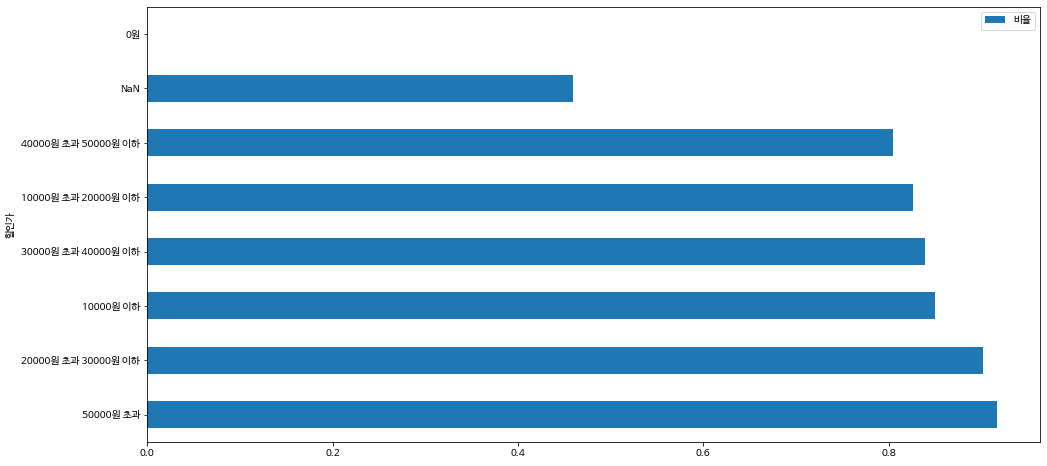

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화두번째.sort_values(by=['비율'],ascending=False).plot.barh(x='할인가', y='비율', rot=0, figsize=(16,8))

In [ ]:
#메인 카테고리별로 쿠폰 할인이 1원 이상, 0원, 결측치
중간단계 = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
첫번째주제 = 중간단계.replace({'category_title':{'일러스트':'디자인'}})
for i in ['지식콘텐츠','비즈니스','파이낸스','관리']:
  첫번째주제 = 첫번째주제[첫번째주제.category_title != i]
CA = []
CB = []
CC = []
CD = []
for j in 첫번째주제['category_title'].unique():
  CA.append(((df['category_title'] == j) & (df['coupon_discount_amount'] > 0)).sum())
  CB.append(((df['category_title'] == j) & (df['coupon_discount_amount'] == 0)).sum())
  CC.append(((df['category_title'] == j) & (df['coupon_discount_amount'].isnull())).sum())
  CD.append(j)
시각화세번째 = pd.DataFrame({'1원이라도':CA,
                          '0원':CB,
                          '결측':CC,
                          '카테고리':CD})
시각화세번째 = 시각화세번째.dropna()
시각화세번째

,1원이라도,0원,결측,카테고리
0,10169,0,24261,프로그래밍
1,4031,0,6229,영상/3D
2,3528,1,9794,업무 생산성
3,332,0,1918,크리에이티브
4,1630,0,3893,부동산/금융
5,3992,0,10084,데이터사이언스
6,4791,0,7218,디자인
7,2215,0,7642,마케팅
8,0,0,1031,교육
9,1124,0,1377,투자/재테크


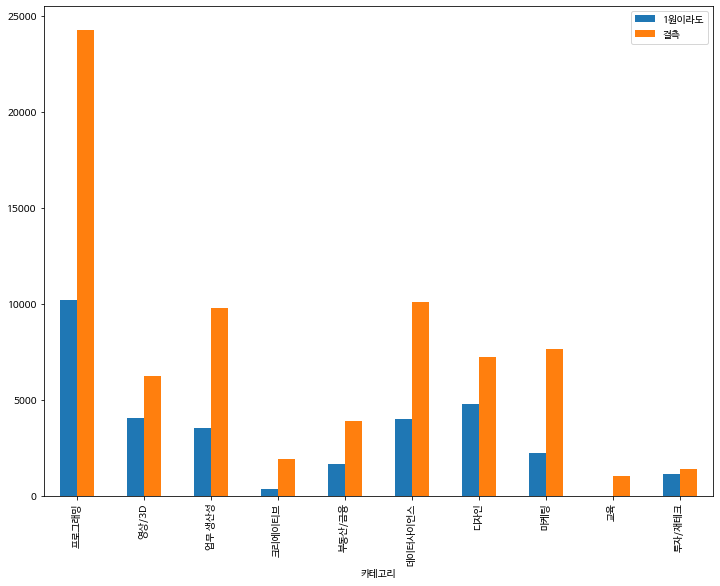

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화세번째.plot(x="카테고리", y=["1원이라도", "결측"], kind="bar",figsize=(12,9))
plt.show()

In [ ]:
#결재대행사별 쿠폰 할인가가 1원 이상인 개수
DA = []
DB = []
DC = []
for i in df['pg'].unique():
  DA.append(i)
  DB.append(((df['coupon_discount_amount'] == 0) & (df['pg'] == i)).sum())
  DC.append(((df['coupon_discount_amount'] > 0) & (df['pg'] == i)).sum())

시각화네번째 = pd.DataFrame({'결제대행사':DA,
                          '할인가0원':DB,
                          '할인가1이상':DC})
시각화네번째 = 시각화네번째.dropna()
시각화네번째

,결제대행사,할인가0원,할인가1이상
1,INICIS,1,16152
2,KAKAO,0,4851
3,CHAI,0,91
4,PAYCO,0,1524
5,NAVER,0,2897


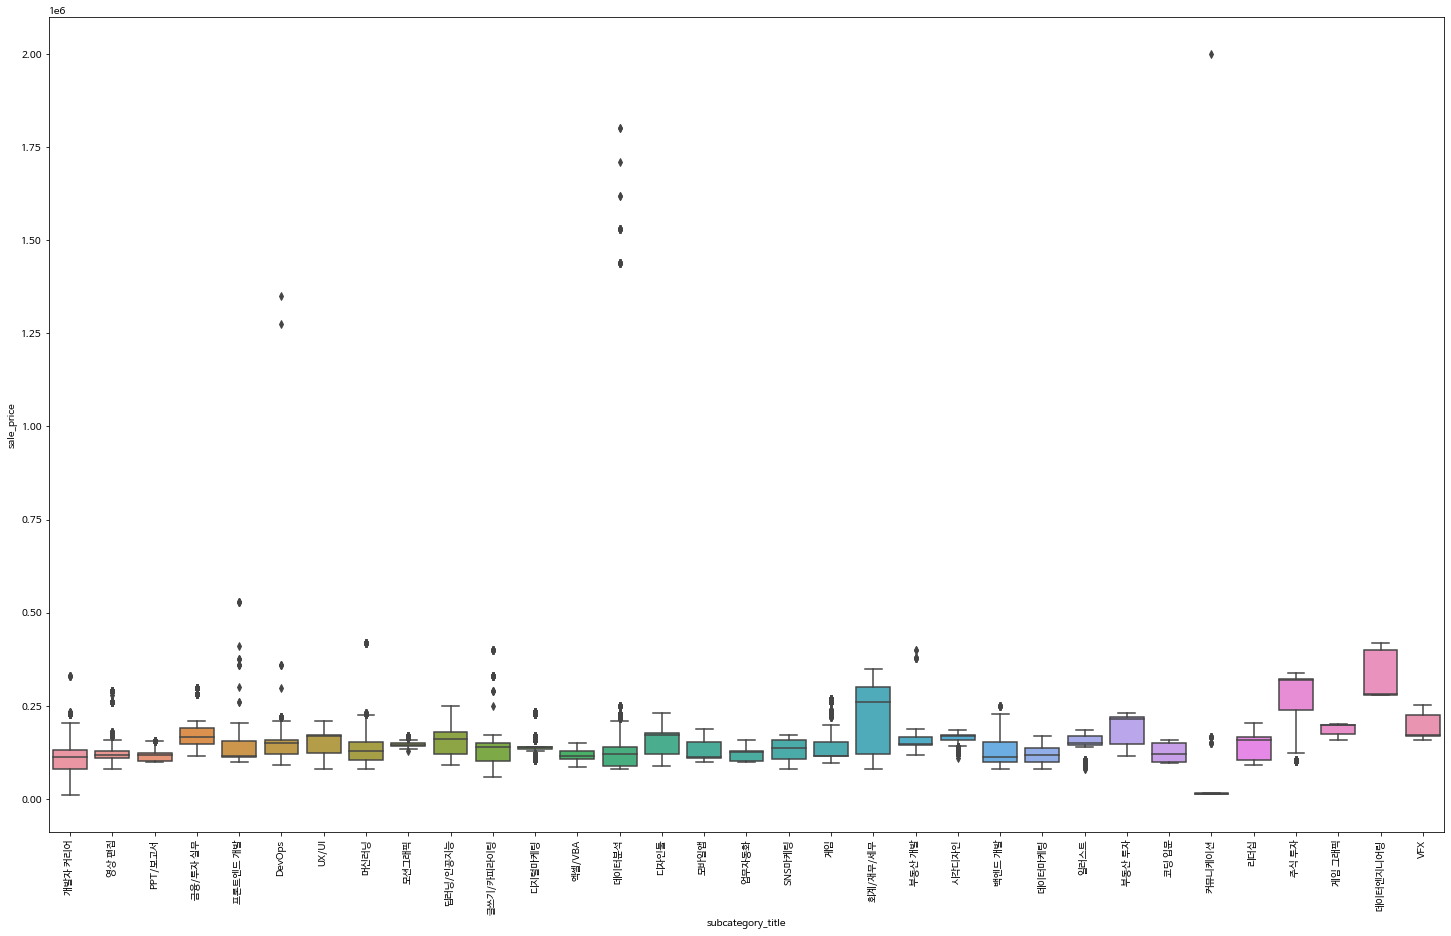

In [ ]:
#서브 카테고리마다 sale_price 기준 box plot 그리기
plt.figure(figsize=(25,15))
plt.xticks(rotation = 90)
sns.boxplot(data=df, x='subcategory_title', y='sale_price')
plt.show()

In [ ]:
#웰컴 쿠폰 중복 수령 사례 개수
중간단계 = df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
세번째주제 = 중간단계[(중간단계['type'] == 'PAYMENT') & (중간단계['state'] == 'COMPLETED')]
print(len(세번째주제) - 세번째주제['customer_id'].nunique())

1176


In [ ]:
#웰컴 쿠폰 중복 수령한 서로 다른 사람 수
중간단계 = df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
세번째주제 = 중간단계[(중간단계['type'] == 'PAYMENT') & (중간단계['state'] == 'COMPLETED')]
세번째주제[세번째주제.duplicated(['customer_id'])]['customer_id'].nunique()

930

In [ ]:
#같은 결제 수단이 이용된 사건의 개수
EA = []
EB = []
EC = []
ED = []
indexes = [6, 7]
brandnew = np.delete(df['method'].unique(), indexes)
for i in brandnew:
  x = len(df[(df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT') & (df['method'] == i)])
  EA.append(x)
  y = len(df[(df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT') & (df['method'] == i)][df[(df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT') & (df['method'] == i)].duplicated(['customer_id'])])
  EB.append(y)
  ED.append(y / x)
  EC.append(i)

시각화다섯번째 = pd.DataFrame({'결제수단 개수':EA,
                          '같은 결제수단 사건 횟수':EB,
                          '그 비율':ED,
                          '결제수단 이름':EC})
시각화다섯번째

,결제수단 개수,같은 결제수단 사건 횟수,그 비율,결제수단 이름
0,3052,437,0.143185,VBANK
1,35196,7923,0.225111,CARD
2,635,84,0.132283,TRANS
3,4720,703,0.148941,PROMOTION
4,1187,169,0.142376,TRANSFER
5,584,80,0.136986,ONSITE
6,7523,1075,0.142895,POINT
7,5,3,0.600000,VOUCHER


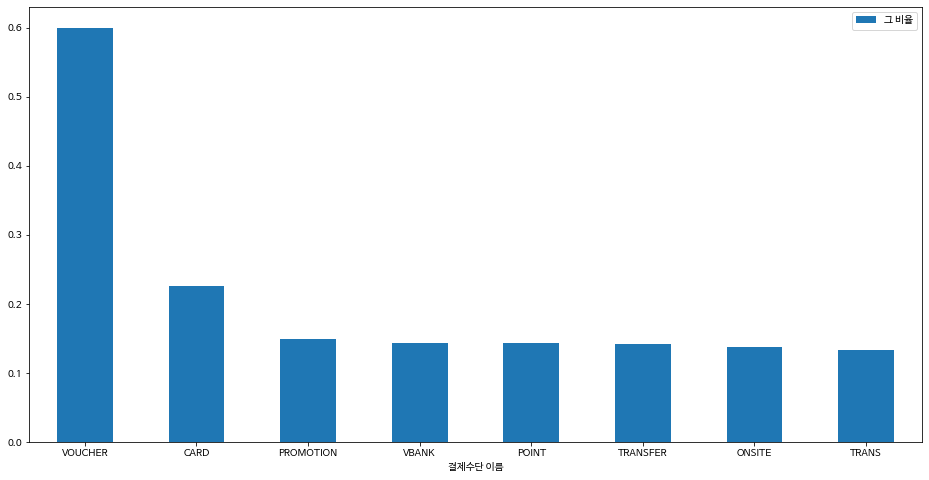

In [ ]:
#위 것을 시각화
시각화다섯번째.sort_values(by=['그 비율'],ascending=False).plot.bar(x='결제수단 이름', y='그 비율', rot=0, figsize=(16,8))